# Q1: EDA - Data Processing

## Loading Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [3]:
# Global seeds
np.random.seed(42)
random.seed(42)

## Q1.1 Feature exploration

### Loading data:

In [4]:
train = pd.read_csv("../ml4h_data/p2/part1/heart_failure/train_val_split.csv")
test = pd.read_csv("../ml4h_data/p2/part1/heart_failure/test_split.csv")

In [5]:
train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
2,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
3,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
4,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
729,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
730,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
731,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
732,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1


In [6]:
test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,60,M,ASY,145,282,0,LVH,142,Y,2.8,Flat,1
1,57,M,ASY,160,0,1,Normal,98,Y,2.0,Flat,1
2,62,F,ASY,150,244,0,Normal,154,Y,1.4,Flat,1
3,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
4,57,M,ASY,128,0,1,ST,148,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
179,57,M,ASY,140,192,0,Normal,148,N,0.4,Flat,0
180,52,M,ATA,120,284,0,Normal,118,N,0.0,Up,0
181,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0
182,48,M,ASY,130,256,1,LVH,150,Y,0.0,Up,1


**Attribute Information**
- *Age*: age of the patient [years]
- *Sex*: sex of the patient [M: Male, F: Female]
- *ChestPainType*: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: - Non-Anginal Pain, ASY: Asymptomatic]
- *RestingBP*: resting blood pressure [mm Hg]
- *Cholesterol*: serum cholesterol [mm/dl]
- *FastingBS*: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- *RestingECG*: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- *MaxHR*: maximum heart rate achieved [Numeric value between 60 and 202]
- *ExerciseAngina*: exercise-induced angina [Y: Yes, N: No]
- *Oldpeak*: oldpeak = ST [Numeric value measured in depression]
- *ST_Slope*: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, -Down: downsloping]
- *HeartDisease*: output class [1: heart disease, 0: Normal]

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Sex             734 non-null    object 
 2   ChestPainType   734 non-null    object 
 3   RestingBP       734 non-null    int64  
 4   Cholesterol     734 non-null    int64  
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    object 
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    object 
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    object 
 11  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 68.9+ KB


In [8]:
train.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,734.000000,734.00000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.523161,132.06267,197.588556,0.232970,136.167575,0.873978,0.542234
std,9.421110,18.61849,108.979439,0.423012,25.334552,1.082222,0.498553
min,29.000000,0.00000,0.000000,0.000000,60.000000,-2.000000,0.000000
25%,47.000000,120.00000,172.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.00000,222.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.00000,267.000000,0.000000,155.000000,1.500000,1.000000
max,77.000000,200.00000,529.000000,1.000000,195.000000,6.200000,1.000000


In [9]:
test.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,53.461957,133.728261,203.630435,0.233696,139.369565,0.940761,0.597826
std,9.504021,18.080333,111.152602,0.424335,25.867344,1.002740,0.491675
min,28.000000,92.000000,0.000000,0.000000,71.000000,-2.600000,0.000000
25%,48.000000,120.000000,176.750000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,140.000000,1.000000,1.000000
75%,60.000000,145.250000,265.250000,0.000000,160.000000,1.600000,1.000000
max,75.000000,200.000000,603.000000,1.000000,202.000000,4.000000,1.000000


In [10]:
X_train = train.drop(columns=["HeartDisease"])
y_train = train["HeartDisease"]
X_test = test.drop(columns=["HeartDisease"])
y_test = test["HeartDisease"]

In [11]:
X_train.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64

In [12]:
X_test.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64

In [13]:
def plot_distributions(df):
    """
    Plots the distribution of the features in the given dataframe.

    Parameters:
    df (pd.DataFrame): The dataframe containing columns to plot.

    Returns:
    None
    """
    # numeric_cols = df.select_dtypes(include=['number']).columns
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 12))

    for i, col in enumerate(df.columns):
        sns.histplot(df[col], kde=True, ax=axes.flatten()[i])
        axes.flatten()[i].set_title(f'{col}')

    plt.suptitle(f"Distribution of the Features")
    plt.tight_layout()
    plt.show()

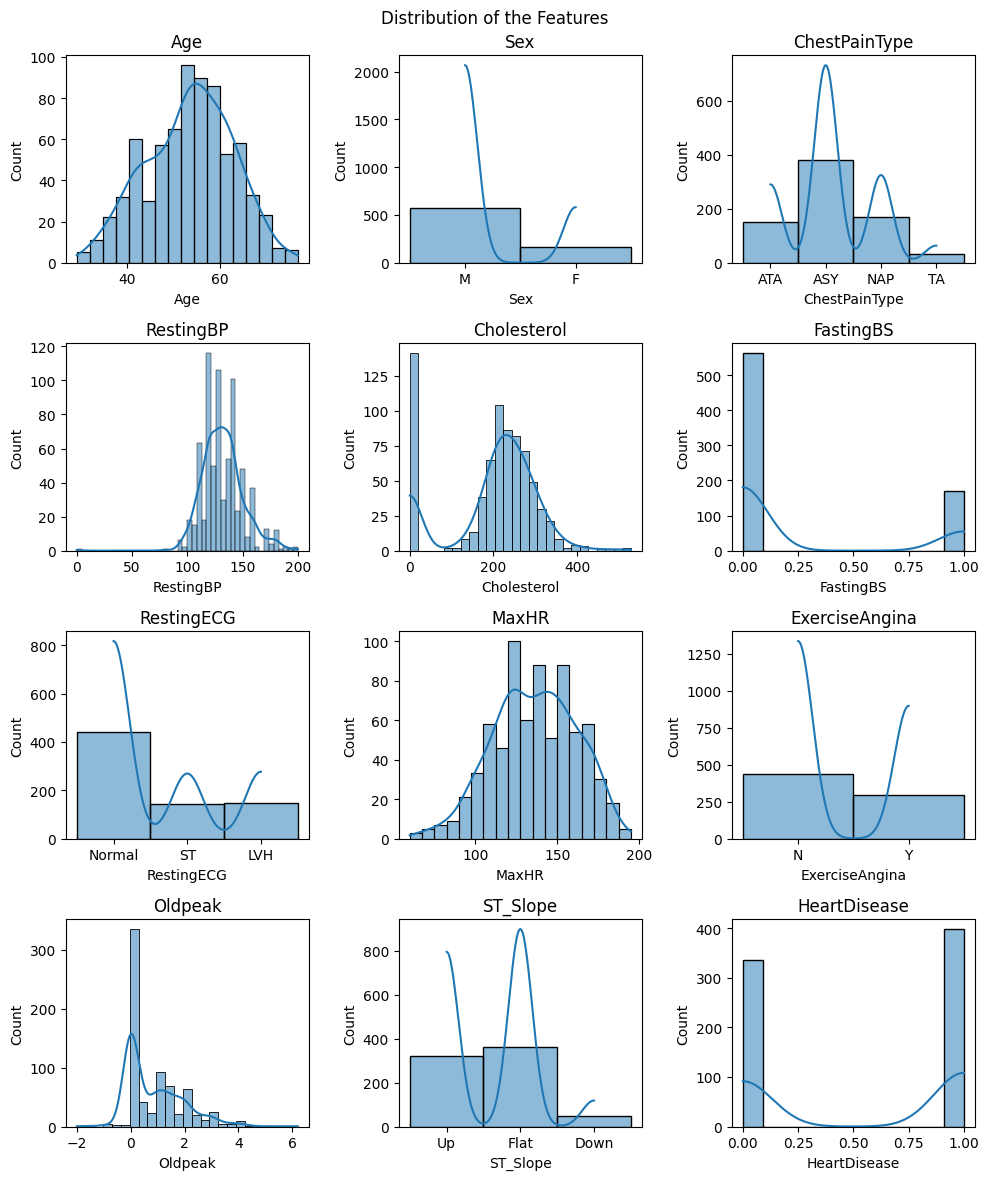

In [14]:
plot_distributions(train)

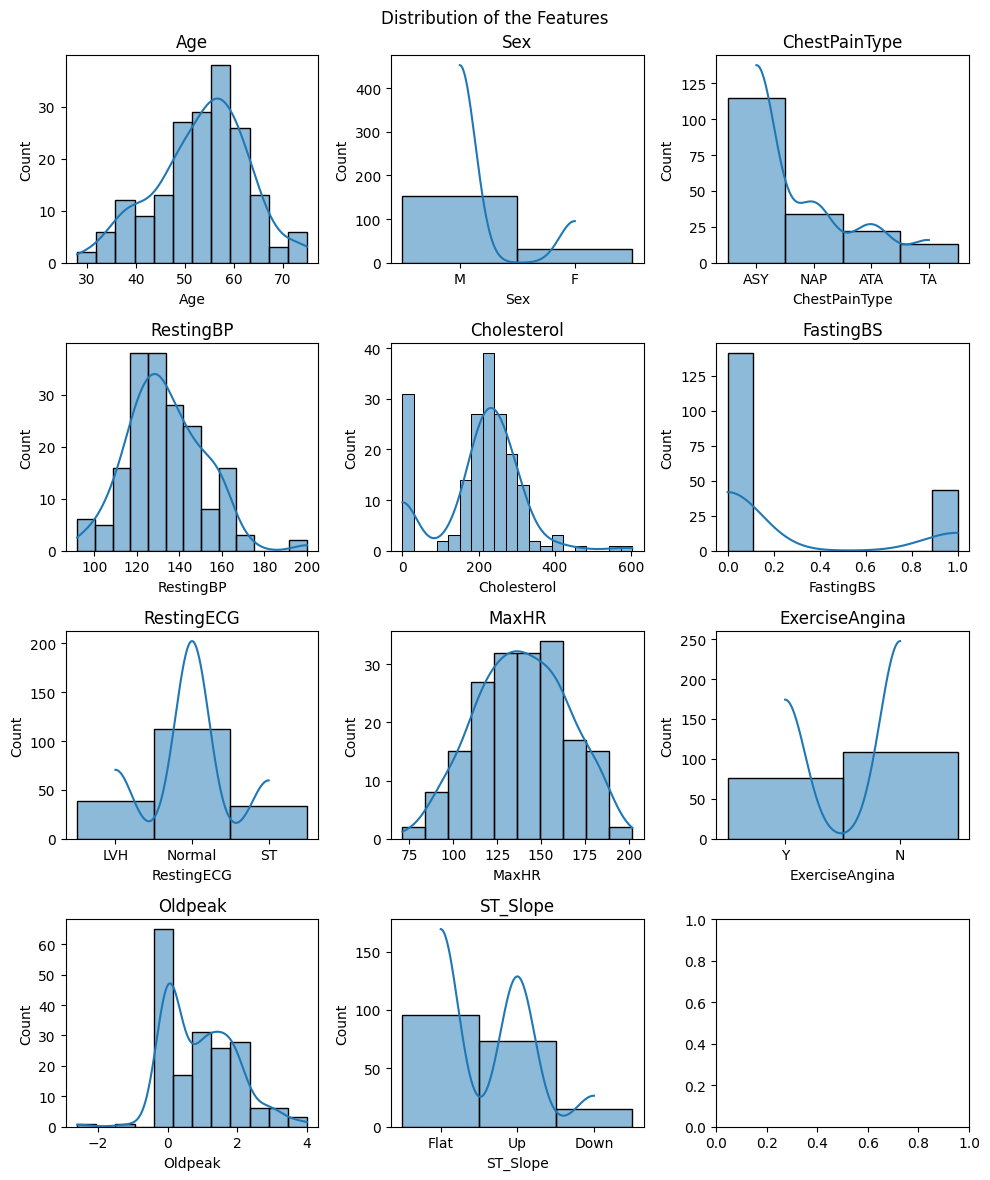

In [15]:
plot_distributions(X_test)

In [16]:
def plot_distributions_y(df, y=None, set_name=None):
    """
    Plots the distribution of numeric columns in the given dataframe.
    If y is provided, separates the bars by the class labels in y.

    Parameters:
    df (pd.DataFrame): The dataframe containing numeric columns to plot.
    y (pd.Series or np.array, optional): Labels to separate the distributions.
    set_name (str, optional): Name of the set to display in the title.

    Returns:
    None
    """
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 14))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        if y is not None:
            # If labels are provided, plot hue based on y
            sns.histplot(data=df, x=col, hue=y, kde=True, ax=axes[i], multiple="stack", element="bars", common_norm=False)
        else:
            sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'{col}')

    title = f"Distribution of the Features"
    if set_name:
        title += f" - {set_name}"
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


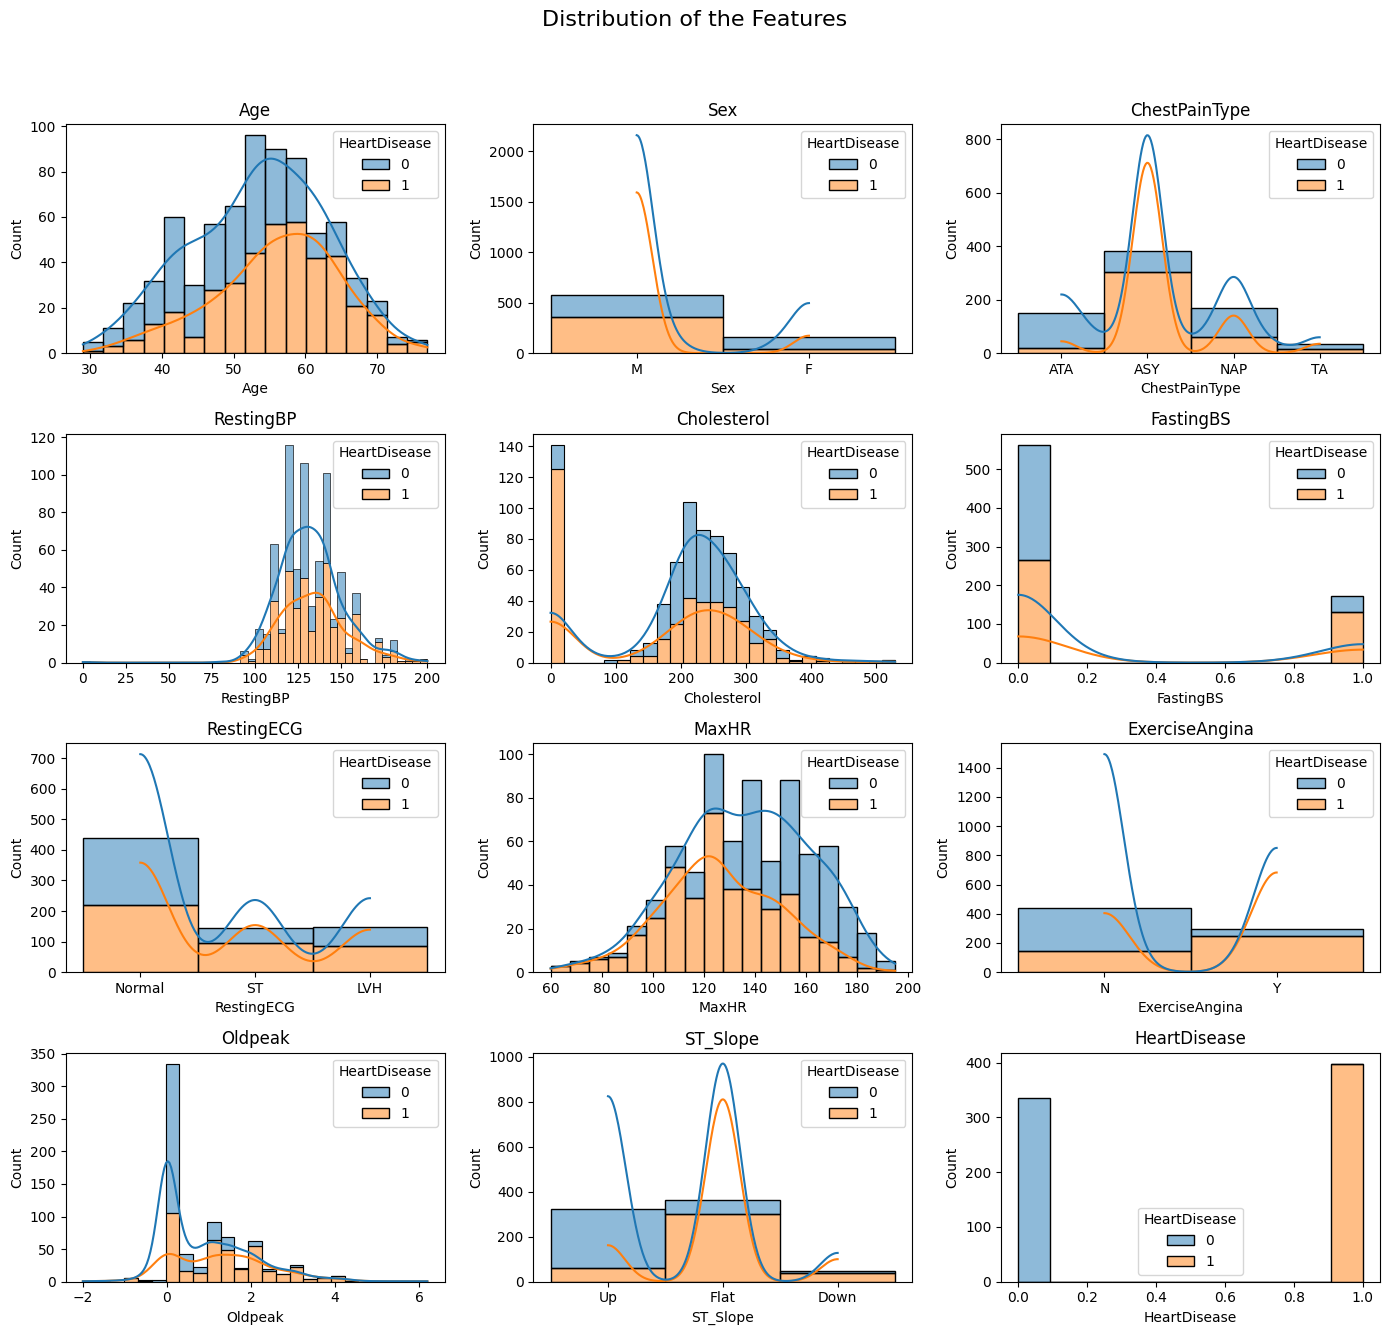

In [17]:
plot_distributions_y(train, y_train)

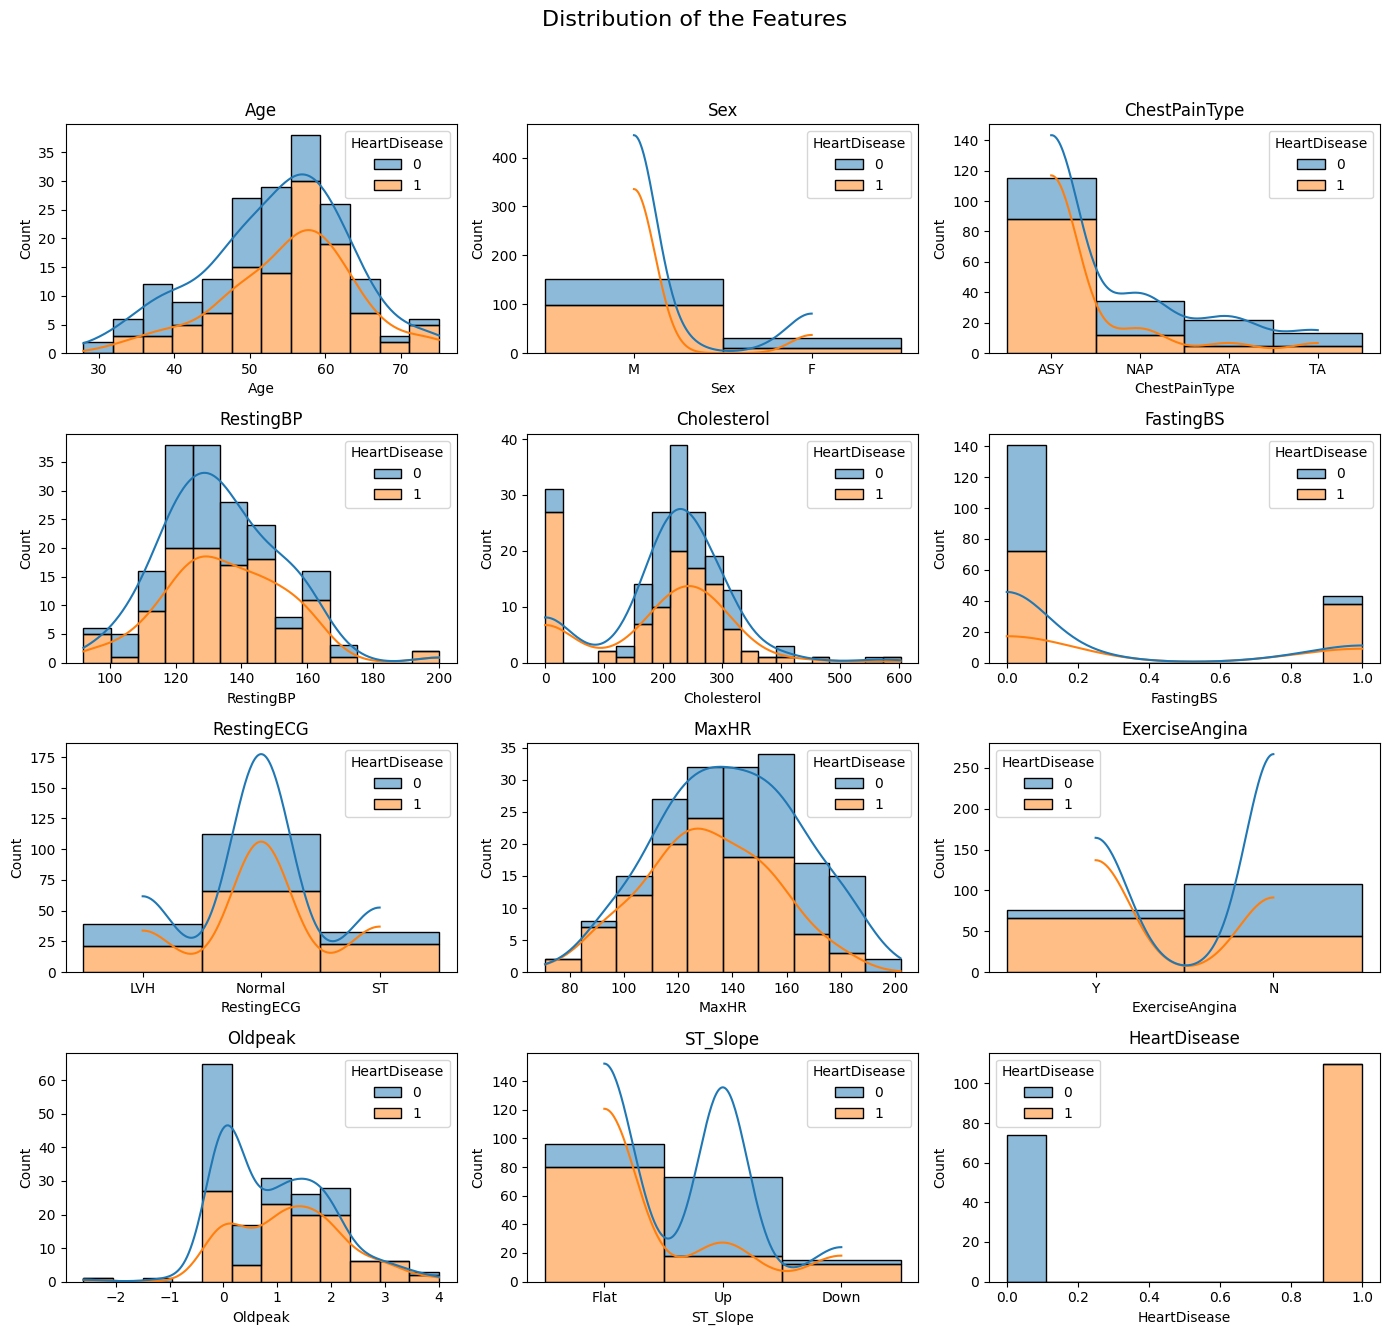

In [18]:
plot_distributions_y(test, y_test)

In [19]:
y_train.value_counts()

HeartDisease
1    398
0    336
Name: count, dtype: int64

In [20]:
y_test.value_counts()

HeartDisease
1    110
0     74
Name: count, dtype: int64

### Looking at outliers

In [21]:
def boxplot_numeric_distributions(df):
    """
    Plots the distribution of numeric columns in the given dataframe,
    excluding the 'FastingBS' column.

    Parameters:
    df (pd.DataFrame): The dataframe containing numeric columns to plot.

    Returns:
    None
    """
    numeric_cols = df.select_dtypes(include=['number']).columns
    numeric_cols = [col for col in numeric_cols if col != 'FastingBS']

    fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols), figsize=(4 * len(numeric_cols), 6))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.boxplot(df[col], ax=axes.flatten()[i])
        axes.flatten()[i].set_title(f'{col}')
        
    title = "Boxplot of Numeric Features"
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


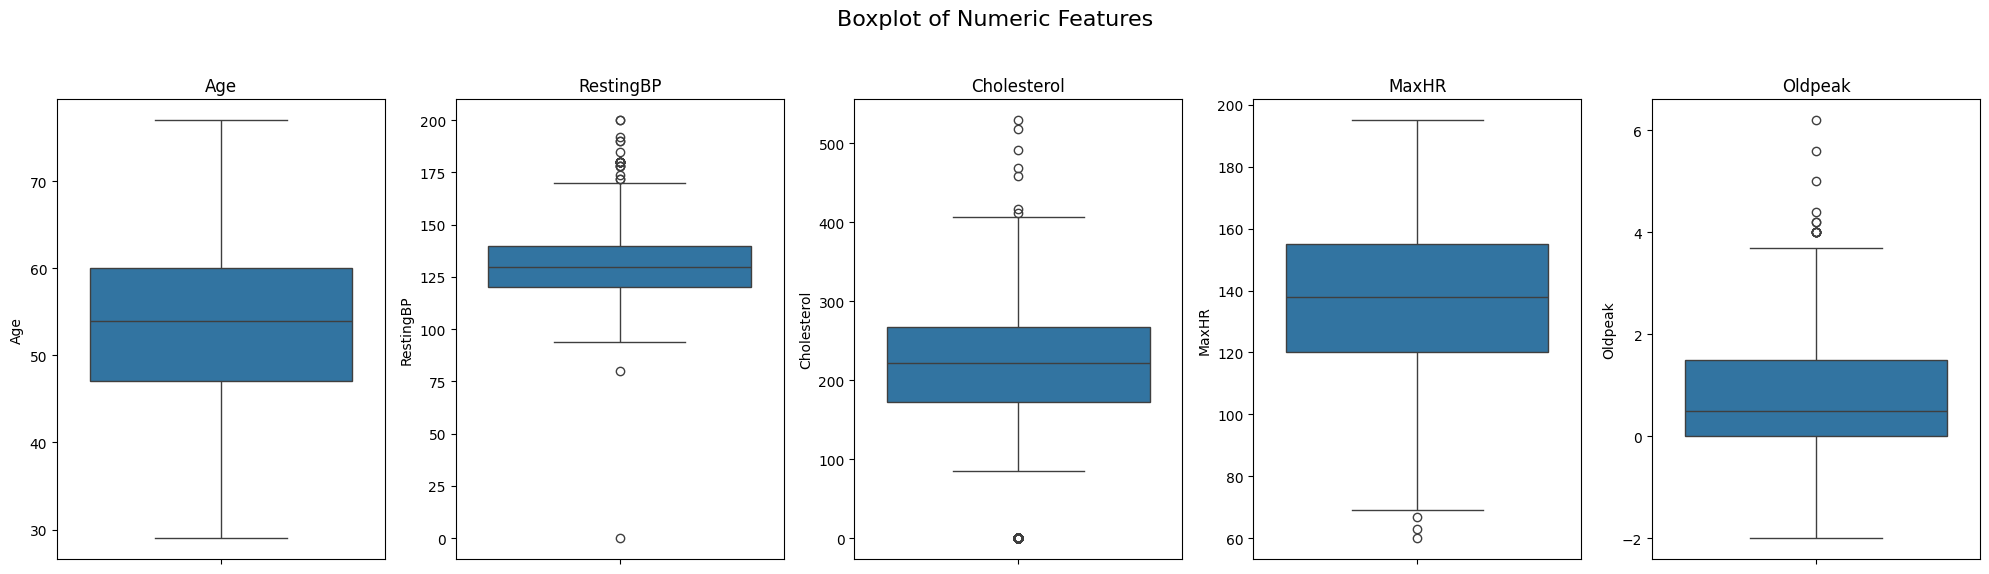

In [22]:
boxplot_numeric_distributions(X_train)

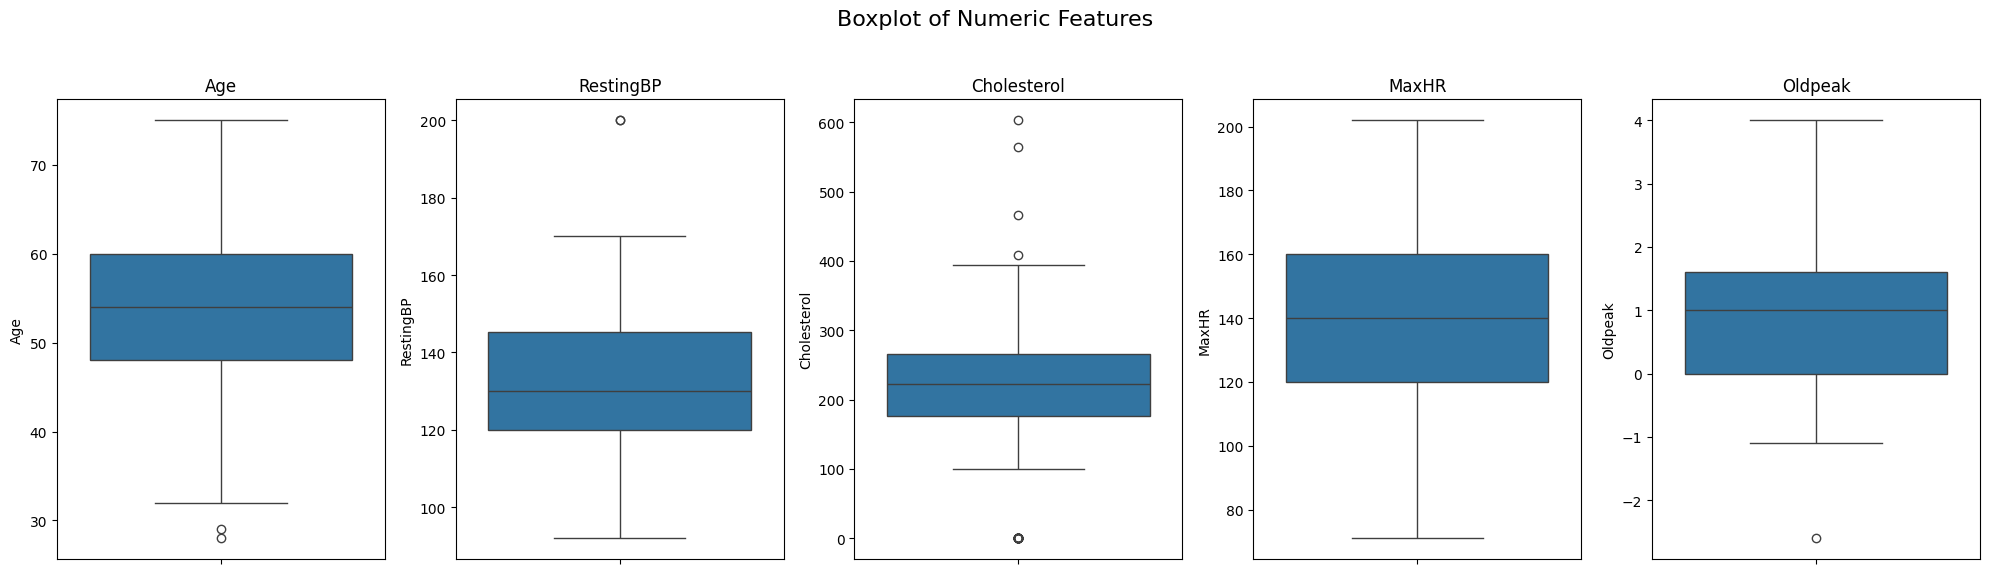

In [23]:
boxplot_numeric_distributions(X_test)

### Looking at correlations

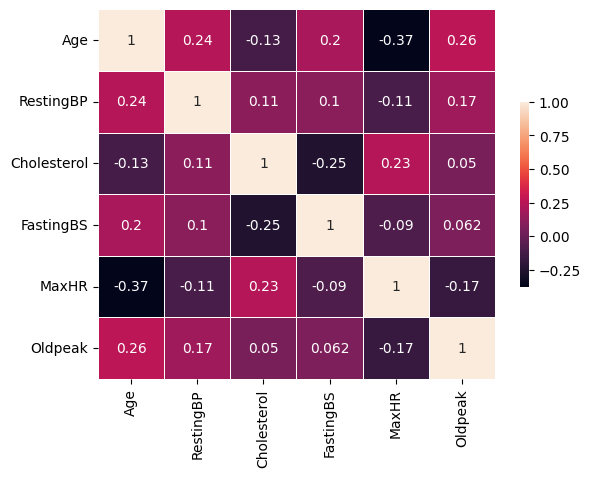

In [24]:
corr = X_train.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, linewidths=0.5, cbar_kws={"shrink": 0.5});

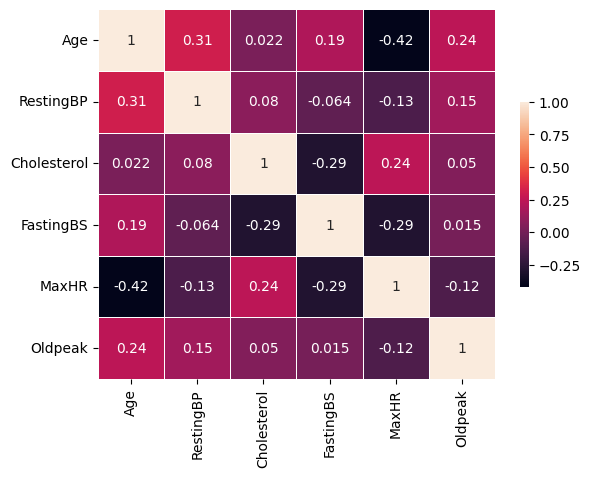

In [25]:
corr = X_test.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, linewidths=0.5, cbar_kws={"shrink": 0.5});

## Q1.2 Data imputation

### Outliers

Based on the previous examination of the dataframe, it seems like the outliers are within biologically feasible range - therefore, we will not remove or modify them.

### OHE of categorical variables

In [26]:
def consistent_ohe_transform(X_train, X_test, categorical_cols, binary_map_cols=None):
    """
    One-hot encodes categorical columns consistently between X_train and X_test.
    Binary columns are mapped manually and NOT one-hot encoded.

    Parameters:
    - X_train (pd.DataFrame): Training feature set
    - X_test (pd.DataFrame): Testing feature set
    - categorical_cols (list): List of multi-class categorical columns to one-hot encode
    - binary_map_cols (dict, optional): Dictionary of binary columns to map manually, e.g. {'Sex': {'M':1, 'F':0}}

    Returns:
    - X_train_transformed (pd.DataFrame)
    - X_test_transformed (pd.DataFrame)
    """
    X_train = X_train.copy()
    X_test = X_test.copy()

    # Step 1: Map binary columns if provided
    if binary_map_cols:
        for col, mapping in binary_map_cols.items():
            if not X_train[col].isin(mapping.keys()).all():
                missing = X_train.loc[~X_train[col].isin(mapping.keys()), col].unique()
                raise ValueError(f"Unexpected values {missing} in column '{col}' of training data.")
            if not X_test[col].isin(mapping.keys()).all():
                missing = X_test.loc[~X_test[col].isin(mapping.keys()), col].unique()
                raise ValueError(f"Unexpected values {missing} in column '{col}' of testing data.")

            X_train[col] = X_train[col].map(mapping)
            X_test[col] = X_test[col].map(mapping)

    # Step 2: One-hot encode ONLY the true categorical columns
    ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    ohe.fit(X_train[categorical_cols])

    # Transform
    X_train_ohe = pd.DataFrame(ohe.transform(X_train[categorical_cols]), columns=ohe.get_feature_names_out(categorical_cols), index=X_train.index)
    X_test_ohe = pd.DataFrame(ohe.transform(X_test[categorical_cols]), columns=ohe.get_feature_names_out(categorical_cols), index=X_test.index)

    # Step 3: Drop only the multi-class categorical columns
    X_train = X_train.drop(columns=categorical_cols)
    X_test = X_test.drop(columns=categorical_cols)

    # Step 4: Concatenate back
    X_train_transformed = pd.concat([X_train, X_train_ohe], axis=1)
    X_test_transformed = pd.concat([X_test, X_test_ohe], axis=1)

    return X_train_transformed, X_test_transformed


In [27]:
binary_map_cols = {
    'Sex': {'M': 1, 'F': 0},
    'ExerciseAngina': {'Y': 1, 'N': 0}
}
categorical_cols = ['ChestPainType', 'RestingECG', 'ST_Slope']

X_train_transformed, X_test_transformed = consistent_ohe_transform(X_train, X_test, categorical_cols, binary_map_cols)

In [28]:
X_train_transformed

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,37,1,130,283,0,98,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,48,0,138,214,0,108,1,1.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,54,1,150,195,0,122,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,39,1,120,339,0,170,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,41,1,120,157,0,182,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
730,57,0,140,241,0,123,1,0.2,0.0,0.0,0.0,1.0,0.0,1.0,0.0
731,45,1,110,264,0,132,0,1.2,0.0,0.0,1.0,1.0,0.0,1.0,0.0
732,68,1,144,193,1,141,0,3.4,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [29]:
X_test_transformed

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,60,1,145,282,0,142,1,2.8,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57,1,160,0,1,98,1,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,62,0,150,244,0,154,1,1.4,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,59,1,164,176,1,90,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,57,1,128,0,1,148,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,57,1,140,192,0,148,0,0.4,0.0,0.0,0.0,1.0,0.0,1.0,0.0
180,52,1,120,284,0,118,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
181,38,1,138,175,0,173,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
182,48,1,130,256,1,150,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Imputing missing/non-sensical values

In [30]:
def model_impute_feature(X_train, X_test, feature_name):
    """
    Imputes missing values (0s) for a given feature using RandomForestRegressor.
    Works separately for training and test sets.

    Parameters:
    - X_train (pd.DataFrame): Training set with missing values
    - X_test (pd.DataFrame): Test set with missing values
    - feature_name (str): Column name to impute

    Returns:
    - X_train_imputed (pd.DataFrame): Training set with imputed values
    - X_test_imputed (pd.DataFrame): Test set with imputed values
    """
    X_train = X_train.copy()
    X_test = X_test.copy()

    # Define features to use for prediction (exclude the target column)
    features = [col for col in X_train.columns if col != feature_name]

    # --- Impute training data ---
    train_non_zero = X_train[X_train[feature_name] != 0]
    train_zero = X_train[X_train[feature_name] == 0]

    model = RandomForestRegressor(random_state=42)
    model.fit(train_non_zero[features], train_non_zero[feature_name])

    if not train_zero.empty:
        X_train.loc[train_zero.index, feature_name] = model.predict(train_zero[features])

    # --- Impute test data ---
    test_zero = X_test[X_test[feature_name] == 0]
    if not test_zero.empty:
        X_test.loc[test_zero.index, feature_name] = model.predict(test_zero[features])

    return X_train, X_test

In [31]:
# Impute RestingBP
X_train_transformed, X_test_transformed = model_impute_feature(X_train_transformed, X_test_transformed, 'RestingBP')

# Impute Cholesterol
X_train_transformed, X_test_transformed = model_impute_feature(X_train_transformed, X_test_transformed, 'Cholesterol')

/tmp/ipykernel_2125342/483046133.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[130.11]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[train_zero.index, feature_name] = model.predict(train_zero[features])
/tmp/ipykernel_2125342/483046133.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[246.18 261.63 272.94 239.02 256.05 231.85 222.33 267.61 240.2  235.63
 256.6  218.26 237.61 233.41 240.01 238.62 232.32 237.19 234.28 259.92
 259.12 251.83 240.13 237.69 246.78 218.43 256.93 250.96 246.82 202.1
 229.96 238.67 237.39 259.87 263.4  260.27 225.72 216.   214.6  233.72
 209.48 229.67 219.11 240.01 222.69 238.33 234.92 266.08 240.89 237.54
 239.39 226.6  294.43 275.01 206.37 226.68 228.2  250.   249.57 363.7
 252.11 241.56 234.61 265.39 238.8  252.93 245.98 238.28 

In [32]:
def plot_restingbp_cholesterol(df, y=None, set_name=None):
    """
    Plots the distribution of RestingBP and Cholesterol after imputation.
    If y is provided, separates the bars by class labels.

    Parameters:
    df (pd.DataFrame): Dataframe containing the columns.
    y (pd.Series or np.array, optional): Labels to separate the distributions.
    set_name (str, optional): Name to display in the title.

    Returns:
    None
    """
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    axes = axes.flatten()

    target_cols = ['RestingBP', 'Cholesterol']

    for i, col in enumerate(target_cols):
        if y is not None:
            sns.histplot(data=df, x=col, hue=y, kde=True, ax=axes[i], multiple="stack", element="bars", common_norm=False)
        else:
            sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'{col}')

    title = "Distribution of RestingBP and Cholesterol"
    if set_name:
        title += f" - {set_name}"
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

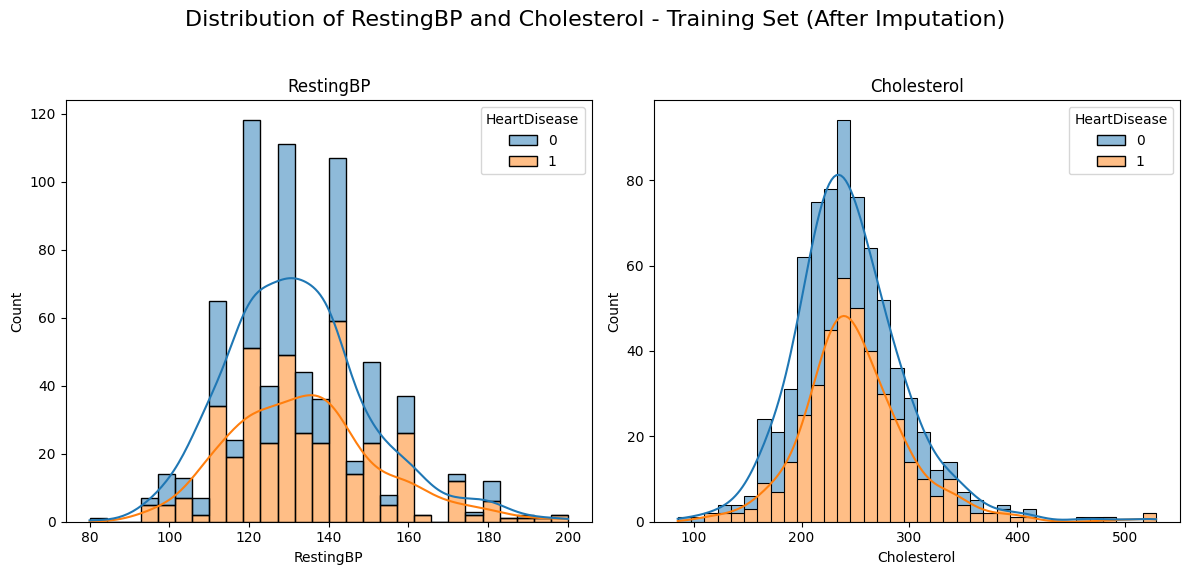

In [33]:
plot_restingbp_cholesterol(X_train_transformed, y=y_train, set_name="Training Set (After Imputation)")


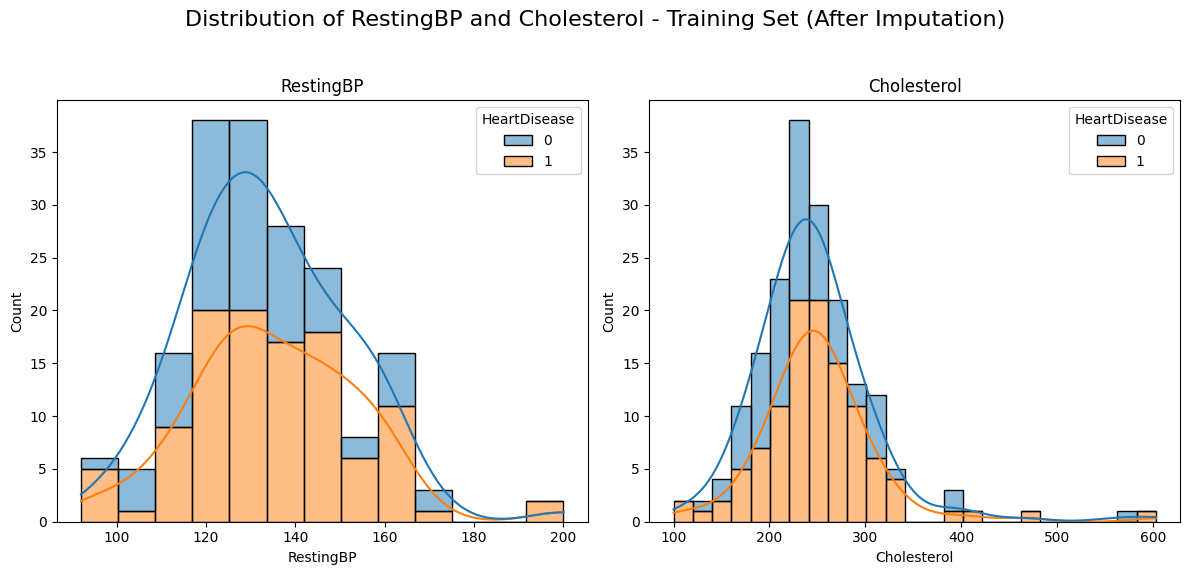

In [34]:
plot_restingbp_cholesterol(X_test_transformed, y=y_test, set_name="Training Set (After Imputation)")


### Scaling

In [35]:
def scale_continuous_features_only(X_train_transformed, X_test_transformed, continuous_cols):
    """
    Scales only continuous columns using StandardScaler, leaves binary and one-hot encoded columns untouched.

    Parameters:
    - X_train_transformed (pd.DataFrame): Training feature set after transformation
    - X_test_transformed (pd.DataFrame): Testing feature set after transformation
    - continuous_cols (list): List of continuous feature column names to scale

    Returns:
    - X_train_final (pd.DataFrame): Scaled training features
    - X_test_final (pd.DataFrame): Scaled testing features
    """
    scaler = StandardScaler()

    # Scale only continuous features
    X_train_cont_scaled = pd.DataFrame(
        scaler.fit_transform(X_train_transformed[continuous_cols]),
        columns=continuous_cols,
        index=X_train_transformed.index
    )

    X_test_cont_scaled = pd.DataFrame(
        scaler.transform(X_test_transformed[continuous_cols]),
        columns=continuous_cols,
        index=X_test_transformed.index
    )

    # Keep categorical columns untouched
    categorical_cols = [col for col in X_train_transformed.columns if col not in continuous_cols]

    # Concatenate scaled continuous + original categorical
    X_train_final = pd.concat([X_train_cont_scaled, X_train_transformed[categorical_cols]], axis=1)
    X_test_final = pd.concat([X_test_cont_scaled, X_test_transformed[categorical_cols]], axis=1)

    return X_train_final, X_test_final

In [36]:
# Define which columns are continuous
continuous_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']  # adjust if necessary

# Apply scaling
X_train_final, X_test_final = scale_continuous_features_only(X_train_transformed, X_test_transformed, continuous_cols)


In [37]:
X_train_final

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,FastingBS,ExerciseAngina,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.436389,0.432191,0.840002,1.415334,-0.808128,1,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-1.755040,-0.124751,0.725098,-1.507570,-0.808128,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.586654,0.320802,-0.596297,-1.112583,0.578854,0,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.050648,0.989133,-0.960159,-0.559601,-0.808128,1,0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,-1.542606,-0.681693,1.797535,1.336337,-0.808128,1,0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,-1.330172,-0.681693,-1.687884,1.810321,-0.808128,1,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
730,0.369299,0.432191,-0.079229,-0.520102,-0.623197,0,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
731,-0.905304,-1.238636,0.361236,-0.164614,0.301458,1,0,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
732,1.537686,0.654968,-0.998461,0.190875,2.335698,1,1,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [38]:
X_train_final.to_csv("X_train_scaled.csv", index=False)
X_test_final.to_csv("X_test_scaled.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)